# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [3]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

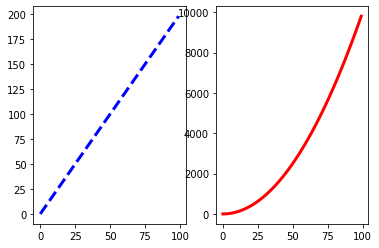

In [20]:
plt.subplot(1,2,1)
plt.plot(x,y,lw=3,color="b", ls='--')
plt.subplot(1,2,2)
plt.plot(x,z,lw=3, color="r",ls='-')

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

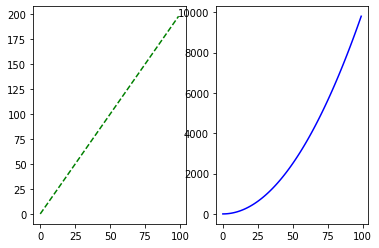

In [29]:
fig,axes=plt.subplots(1,2)
axes[0].plot(x,y,color="g",ls='--')
axes[1].plot(x,z,color="b",ls='-')


#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

Text(0, 0.5, 'z')

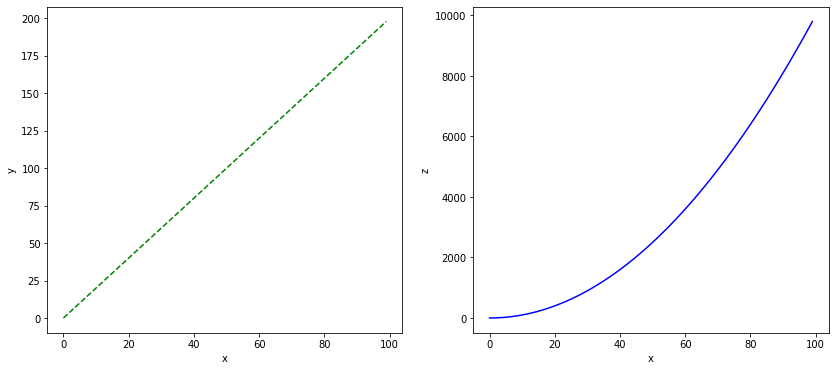

In [39]:
fig,axes=plt.subplots(1,2,figsize=(14, 6))

axes[0].plot(x,y,color="g",ls='--')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')

axes[1].plot(x,z,color="b",ls='-')
axes[1].set_xlabel('x')
axes[1].set_ylabel('z')

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Logarithmic scale (y)')

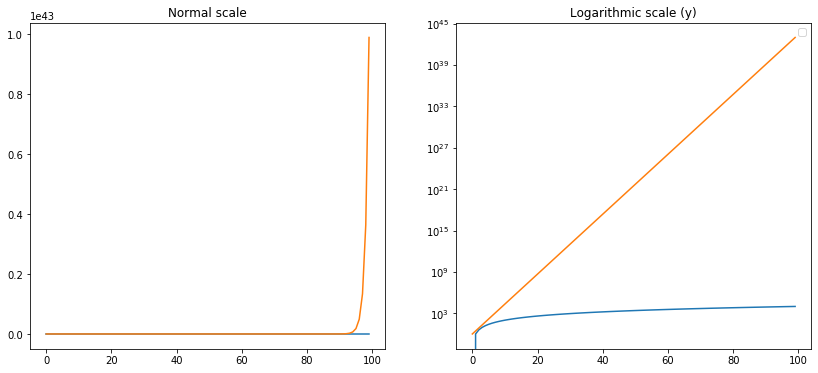

In [47]:
fig,axes=plt.subplots(1,2,figsize=(14, 6))
axes[0].plot(x, x**2,x, np.exp(x))
axes[0].set_title('Normal scale')


axes[1].plot(x, x**2,x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title('Logarithmic scale (y)')

#### As a bonus challenge, try to add a legend to the plot.

No handles with labels found to put in legend.
/Users/jidekickpush/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


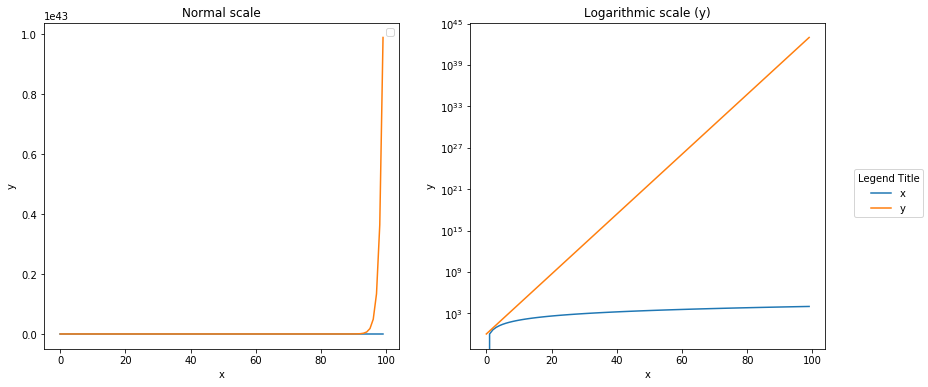

In [61]:
fig,axes=plt.subplots(1,2,figsize=(14, 6))
axes[0].plot(x, x**2,x, np.exp(x))
axes[0].set_title('Normal scale')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].legend()

axes[1].plot(x, x**2,x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title('Logarithmic scale (y)')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')

fig.legend([1, 2],
           labels=['x','y'],
           loc="center right",
           title="Legend Title")


## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [65]:
fitbit=pd.read_csv('/Users/jidekickpush/Downloads/Ironhack/fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

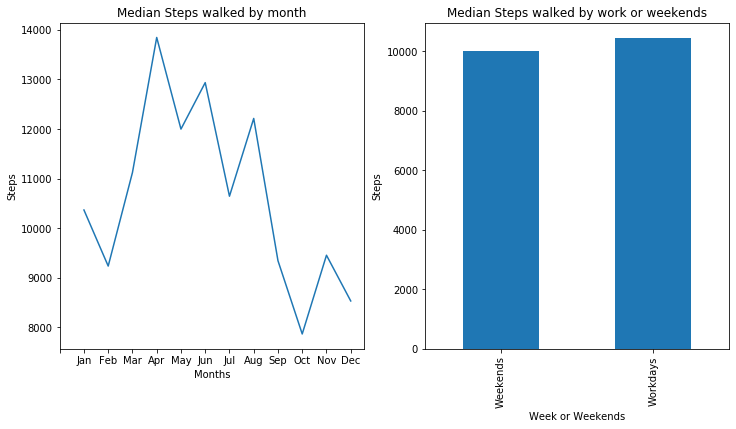

In [113]:
# MEDIAN STEPS BY MONTH_ENCODED
weekday_steps=fitbit['Steps'].groupby(fitbit['Months_encoded']).agg('median')
weekday_steps.head(10)

fig,axes=plt.subplots(1,2,figsize=(12, 6))
plt.sca(axes[0])
weekday_steps.plot(kind = 'line')
plt.ylabel('Steps')
plt.xlabel('Months')
plt.title('Median Steps walked by month')
plt.xticks(list(range(13)),['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

#plt.savefig('steps_months.png',bbox_inches='tight')


# MEDIAN STEPS BY WORK_OR_WEEKEND
weekday_steps=fitbit['Steps'].groupby(fitbit['Work_or_Weekend']).median().sort_values()
plt.sca(axes[1])
weekday_steps.plot(kind = 'bar')
plt.ylabel('Steps')
plt.xlabel('Week or Weekends')
plt.title('Median Steps walked by work or weekends')
plt.xticks(list(range(2)),['Weekends','Workdays'])

plt.savefig('steps_months & steps_weeks.png',bbox_inches='tight')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

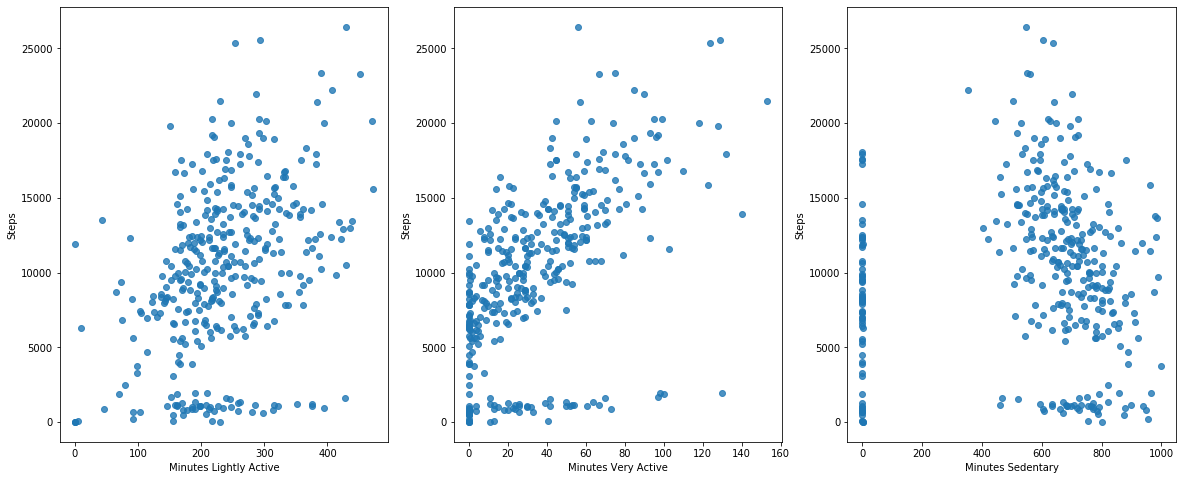

In [112]:
cols=['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary','Steps']
df=fitbit[cols]

fig, axes=plt.subplots(1,3, figsize=(20,8))
for i in range(3):
    plt.sca(axes[i])
    plt.scatter(df.iloc[:,i],df['Steps'], alpha = 0.8)
    plt.xlabel(df.iloc[:,i].name)
    plt.ylabel('Steps')

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [114]:
titanic=pd.read_csv('/Users/jidekickpush/Downloads/Ironhack/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [115]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [121]:
# NUMERICAL VARIABLES
titanic.select_dtypes(exclude=object).head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [122]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(exclude=[int,float]).head(5)

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [124]:
plt.style.use('classic')
sns.set_style('ticks')
plt.rcParams['figure.figsize'] = (12, 6)

#### Use the right visulalization to show the distribution of column `Age`.

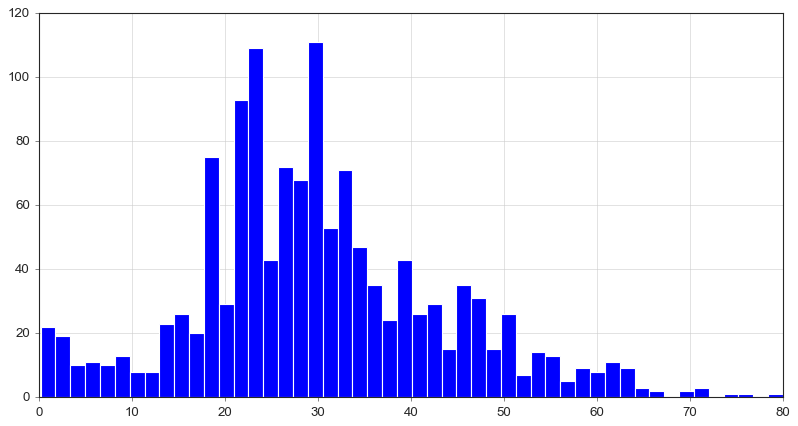

In [127]:
titanic['Age'].hist(bins=50)

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

In [ ]:
# your code here

#### How does the bin size affect your plot?

In [ ]:
"""
your comments here
"""

#### Use seaborn to show the distribution of column `Age`.

In [ ]:
# your code here

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Use the right plot to visualize the column `Pclass`.

In [ ]:
# your code here

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Plot the correlation matrix using seaborn.

In [ ]:
# your code here

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here